<a href="https://colab.research.google.com/github/rahulll-gif/task1/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving archive.zip to archive (3).zip
 Files extracted: ['.config', 'archive (1).zip', 'Titanic-Dataset.csv', 'archive.zip', 'archive (2).zip', 'archive (3).zip', 'sample_data']
 Dataset Loaded Successfully!

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1    

<ipython-input-5-7f106671002d>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


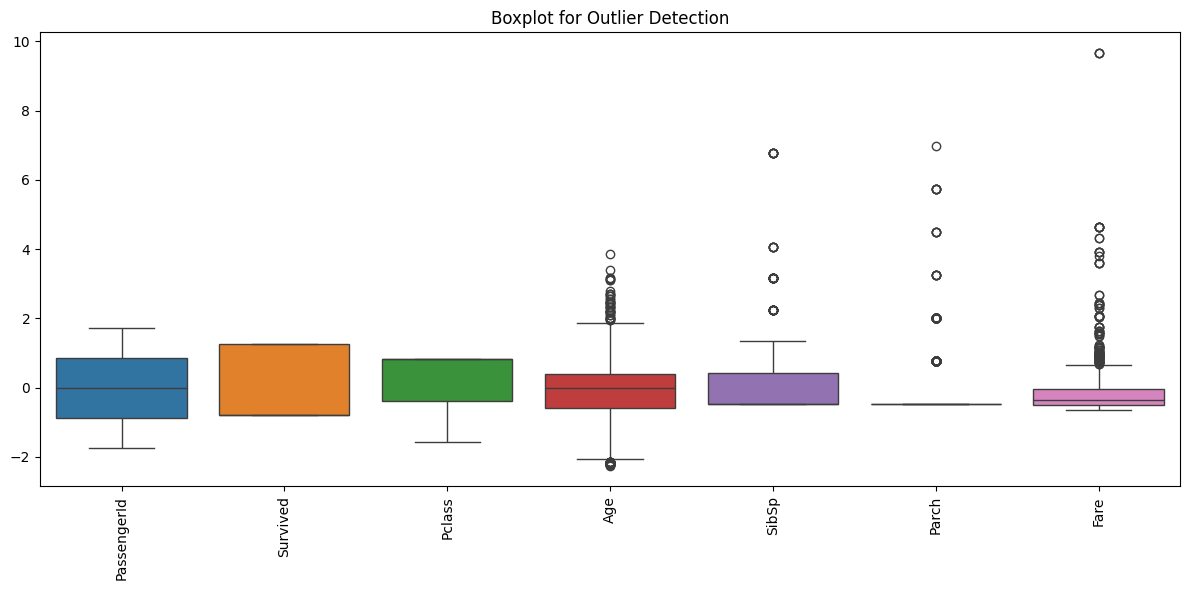

 Rows after removing outliers: 577


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import zipfile
import os
from google.colab import files
uploaded = files.upload()
with zipfile.ZipFile("archive.zip", 'r') as zip_ref:
    zip_ref.extractall()
print(" Files extracted:", os.listdir())
df = pd.read_csv('Titanic-Dataset.csv')
print(" Dataset Loaded Successfully!\n")
print(df.head())
print(df.info())
df.fillna(df.mean(numeric_only=True), inplace=True)
if 'Embarked' in df.columns:
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df_encoded = pd.get_dummies(df, drop_first=True)
numeric_cols = df_encoded.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded[numeric_cols])
df_scaled = pd.DataFrame(scaled_data, columns=numeric_cols)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_scaled)
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
Q1 = df_scaled.quantile(0.25)
Q3 = df_scaled.quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df_scaled[~((df_scaled < (Q1 - 1.5 * IQR)) | (df_scaled > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f" Rows after removing outliers: {df_no_outliers.shape[0]}")


Mounted at /content/drive
